# ¿A dónde realizan su primera reserva los nuevos usuarios de Airbnb?

Durante este práctico vamos a trabajar sobre el dataset [Airbnb New User Bookings](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data) de Kaggle.

Airbnb nos ofrece una lista de usuarios (todos de EEUU) junto con sus datos demográficos, registros de sesiones web y algunas estadísticas extras. Hay 12 posibles resultados del país de destino:  __US__, __FR__, __CA__, __GB__, __ES__, __IT__, __PT__, __NL__, __DE__, __AU__, __NDF__ (no se ha encontrado ningún destino), y __other__. 

Las variables con las que trabaja el dataset son:
 * __id__: identificación de usuario.
 * __date_account_created__: fecha de la creación de la cuenta.
 * __timestamp_first_active__: timestamp de primera actividad.
 * __date_first_booking__: fecha de primer viaje.
 * __gender__: género.
 * __age__: edad.
 * __signup_method__: método de registración.
 * __signup_flow__: la página desde la cual un usuario vino a registrarse.
 * __language__: preferencia de idioma internacional.
 * __affiliate_channel__: tipo de marketing pagado.
 * __affiliate_provider__: de donde es el marketing.
 * __first_affiliate_tracked__: seguimiento previo a la registración.
 * __signup_app__: aplicación de registración.
 * __first_device_type__: tipo de dispositivo.
 * __first_browser__: búscador.
 * __country_destination__: país escogido para realizar un viaje.

## Objetivo y alcance:

En este laboratorio realizaremos un trabajo de exploración sobre el dataset de Airbnb y luego una posterior comunicación de dichos resultados, pensando que nuestro análisis será utilizado por el __área de marketing de la empresa__, para el diseño de nuevas estrategias comerciales.

  * Realizar análisis de estadística descriptiva sobre los datos, tanto en una como en múltiples variables.
  * Comunicar aspectos de los datos a través de visualizaciones.
  * Resolver y proponer preguntas de interpretación no triviales.

## Estructura del informe:

  * Jupyter Notebook con el análisis realizado.
  * Reporte para el área de marketing, el formato queda a libre consideración del alumno, por ejemplo: página web, whitepaper, presentación, etc.  

---

In [111]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import datetime
from scipy import stats
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
#data from csv files is imported to pandas data frames
data= pd.read_csv("../Datos/data.csv") #Path a los datos
data.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [4]:
data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

Podemos ver que el dataset no se encuentra completo, ya que __date_first_booking__, __age__ y __first_affiliate_tracked__ tienen valores NaN. Sin embargo, siempre debemos examinar con cierta cautela nuestros datos, por que por ejemplo en la categoría __gender__ tenemos valores _unknown_, que para el caso serían lo mismo que un NaN.

In [5]:
data.shape

(213451, 16)

In [6]:
#replacing gender and age values which are not present to Nan
data.gender.replace('-unknown-',np.nan, inplace=True)
data.age.replace('NaN', np.nan, inplace=True)
data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


## Laboratorio:

Este laboratorio tiene como objetivo principal el de emular el trabajo de un __Data Scientist__ de Airbnb, al cual le han encomendado la tarea de analizar a fondo los datos y generar recomendaciones para el área de marketing. Nuestra tarea entonces será la de explotar los conocimientos adquiridos y las herramientas a nuestra disposición para transformar los _datos_ en _conocimiento_.

A continuación les presento una serie de preguntas obligatorias que se deben responder, sin embargo los invito a que cada uno se tome las libertades que crean convenientes para enriquecer aún más el análisis y por consiguiente los resultados.

**1.** ¿Cuáles son los destinos escogidos, segmentados por género y edad?

**2.** ¿Cuántas cuentas han sido creadas por año?

**3.** ¿Cuántos viajes se han realizados por año?

**4.** Corregir el formato de __timestamp_first_active__ para poder leerlo como una fecha.

**5.** ¿Qué porcentaje de los usuarios realizaron una búsqueda en Airbnb, previo a proceder con la creación de su cuenta? (Ayuda: ver __timestamp_first_active__).

**6.** ¿Cuál es el tiempo promedio entre __timestamp_first_active__ y __date_account_created__?

**7.** ¿Cuál es el tiempo promedio entre __date_account_created__ y __date_first_booking__?

**8.** ¿Qué podemos extraer como conclusión de las preguntas 7 y 8?

**9.** ¿Hay un __signup_method__ preferido?, ¿Y segmentado por sexo?, ¿Y por edad?

**10.** ¿Hay un __signup_app__ preferido?, ¿Y por sexo?, ¿Y por edad?

**11.** ¿Cuál es el dispositivo más usado, según el sexo y la edad de los usuarios?

**12.** Si bien los usuarios son de EEUU, ¿Existen usuarios con otras preferencias idiomáticas?

**13.** ¿Existe alguna correlación entre el lugar elegido y la edad de los usuarios?

**14.** Graficar la cantidad de viajes por fecha. ¿Existe alguna tendencia?

**15.** Graficar la actividad de los usuarios por día de la semana. ¿Cómo afecta esto a las campañas de marketing?

Finalmente, con todas las respuestas obligatorias más las que ustedes mismos se hayan formulado, los invito a realizar un informe, en el formato que más les guste, el cual será presentado al "área de marketing de Airbnb". Como premisa principal, la comunicación tiene que ser entendible y concreta.

In [7]:
data.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [8]:
#set corrects datetypes
dcol = ['date_account_created','timestamp_first_active','date_first_booking']

for i in dcol:
    if 'timestamp' not in i:
        data[i] = pd.to_datetime(data[i],format= '%Y-%m-%d')
    else:
        data[i] = pd.to_datetime(data[i],format='%Y%m%d%H%M%S')        
        

In [9]:
#revisamos los datos y buscamos outliers de edad, ya que tener edad nula es inusual
data['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

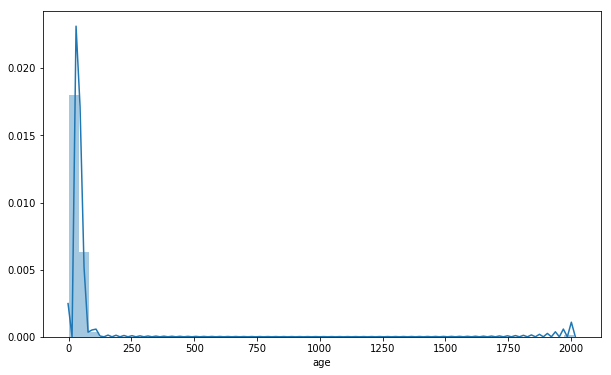

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(data['age'].dropna())

Se observan valores muy alejados de la media para lo que es la edad. Procederemos a limpiar un poco el dataset y sacar esos outliers.

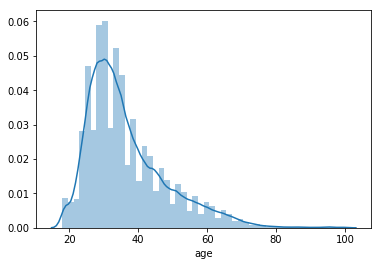

In [11]:
#transform outliers into NaN
data.loc[data['age'] < 18, 'age'] = np.NaN
data.loc[data['age'] > 100, 'age'] = np.NaN
sns.distplot(data['age'].dropna())

Limpiamos los outliers en edad.

In [12]:
#**1.** ¿Cuáles son los destinos escogidos, segmentados por género y edad?
data.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,NaN,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,NaN,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [13]:
data['country_destination'].unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

In [14]:
data['gender'].unique()

array([nan, 'MALE', 'FEMALE', 'OTHER'], dtype=object)

In [15]:
data['age'].describe().loc[['min','max']]

min     18.0
max    100.0
Name: age, dtype: float64

In [63]:
bins = [18, 30, 50, 70, 100]
labels = ['joven(18-29)', 'adulto(30-49)', 'adulto mayor(50-69)', 'anciano(70-100)']
data['bins'] = pd.cut(data['age'], bins=bins, labels=labels, include_lowest=True)
data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,bins
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,adulto(30-49)
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,adulto mayor(50-69)
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,adulto(30-49)
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,adulto(30-49)


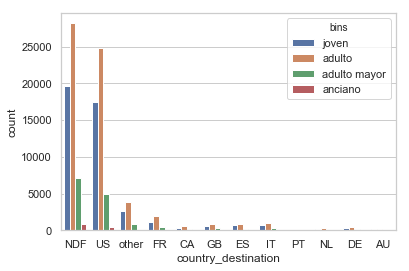

In [17]:
sns.set(style="whitegrid")
sns.countplot(data=data, x="country_destination", hue="bins")

El destino mas elegido es en US, pero la mayoria de los usuarios no ha ingresado destino aun o no se encuentra el dato. Luego se observa que la mayoria de los usuarios en cada grupo se halla en categoria adulto (edad entre 30 y 50) seguidos por jovenes (edad entre 18 y 30)

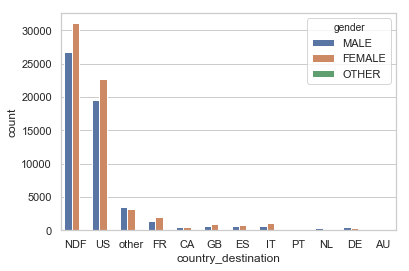

In [18]:
sns.set(style="whitegrid")
sns.countplot(data=data, x="country_destination", hue="gender")

Observamos que la mayoria de las personas elijen US como destino, cuyo mayor porcentaje son mujeres. Igualmente el mayor numero de individuos, en su mayoria mujeres, no ha elegido destino. Esto se debe a que en el dataset la mayoria de usuarias se han registrado como FEMALE.

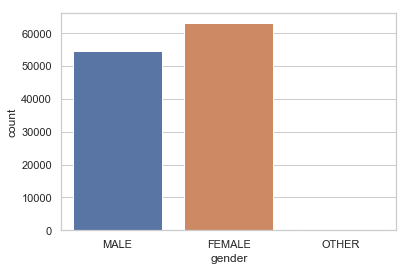

In [19]:
sns.countplot(data=data, x='gender')

In [20]:
#2. ¿Cuántas cuentas han sido creadas por año?
data.groupby(data.date_account_created.dt.year).date_account_created.count()

date_account_created
2010     2788
2011    11775
2012    39462
2013    82960
2014    76466
Name: date_account_created, dtype: int64

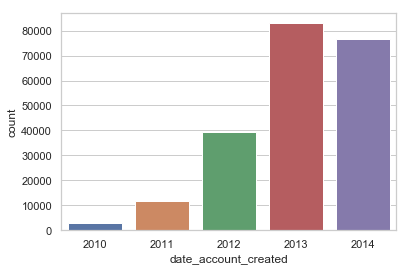

In [21]:
sns.countplot(data=data, x=data.date_account_created.dt.year)

La cantidad de cuentas creadas fue en aumento cada año alcanzando el maximo en el 2013 con mas de 80000 y una leve merma en el 2014.

In [22]:
#3. ¿Cuántos viajes se han realizados por año?
data.groupby(data.date_first_booking.dt.year).date_first_booking.count()

date_first_booking
2010.0     1479
2011.0     5738
2012.0    16241
2013.0    31259
2014.0    32419
2015.0     1772
Name: date_first_booking, dtype: int64

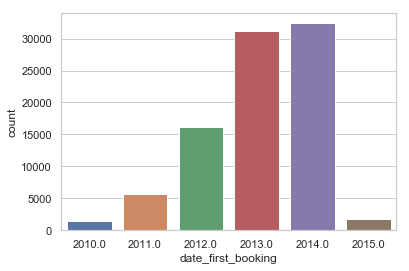

In [23]:
sns.countplot(data=data, x=data.date_first_booking.dt.year)

In [24]:
#4. Corregir el formato de timestamp_first_active para poder leerlo como una fecha.
data.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
bins                             category
dtype: object

In [25]:
#5.¿Qué porcentaje de los usuarios realizaron una búsqueda en Airbnb, 
# previo a proceder con la creación de su cuenta? (Ayuda: ver timestamp_first_active).
data[:10]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,bins
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,adulto
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,adulto mayor
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,adulto
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,adulto
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,NaN,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,NaN
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,adulto
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,adulto
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,adulto
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,NaN,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US,adulto


In [26]:
vprevio = (data.query('timestamp_first_active < date_account_created').timestamp_first_active.count() * 100) / data.timestamp_first_active.count()
print("porcentaje de usuarios = " + str(round(vprevio,2))+'%')

porcentaje de usuarios = 0.08%


In [27]:
#6. ¿Cuál es el tiempo promedio entre timestamp_first_active y date_account_created?
d1 = data.timestamp_first_active
d2 = data.date_account_created

d1.describe()

count                  213451
unique                 213451
top       2013-07-01 05:26:34
freq                        1
first     2009-03-19 04:32:55
last      2014-06-30 23:58:24
Name: timestamp_first_active, dtype: object

In [28]:
d2.describe()

count                  213451
unique                   1634
top       2014-05-13 00:00:00
freq                      674
first     2010-01-01 00:00:00
last      2014-06-30 00:00:00
Name: date_account_created, dtype: object

In [29]:
d3 = (d1 - d2) / 2
d3.mean()

Timedelta('0 days 03:35:23.185218')

In [30]:
#7. ¿Cuál es el tiempo promedio entre date_account_created y date_first_booking?
d1b = data.date_first_booking
d1b.describe()

count                   88908
unique                   1976
top       2014-05-22 00:00:00
freq                      248
first     2010-01-02 00:00:00
last      2015-06-29 00:00:00
Name: date_first_booking, dtype: object

In [31]:
d4 = (d1b - d2) / 2 
d4.mean()

Timedelta('22 days 04:20:59.927115')

#### 8. ¿Qué podemos extraer como conclusión de las preguntas 6 y 7? --(corregido el enunciado) 
Podemos concluir que los nuevos usuarios tienden a tener actividad inmediata en su cuenta, en promedio tienen actividad dentro de las 3 horas proximas. En cambio con respecto al tiempo en que los nuevos usuarios hacen su primer reserva nos muestra un promedio de 22 días.


In [40]:
#9. ¿Hay un signup_method preferido?, ¿Y segmentado por sexo?, ¿Y por edad?
data.signup_method.mode()

0    basic
dtype: object

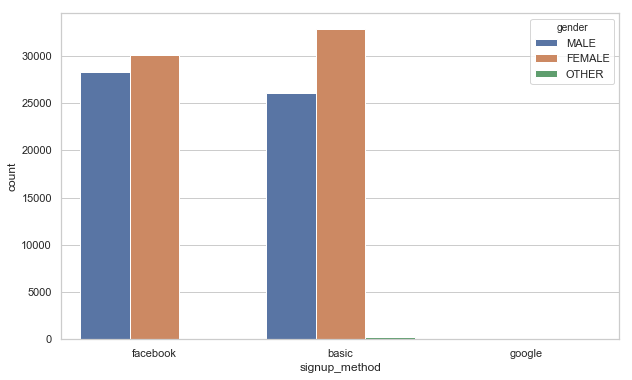

In [52]:
#segmentado por sexo
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='signup_method',hue='gender')

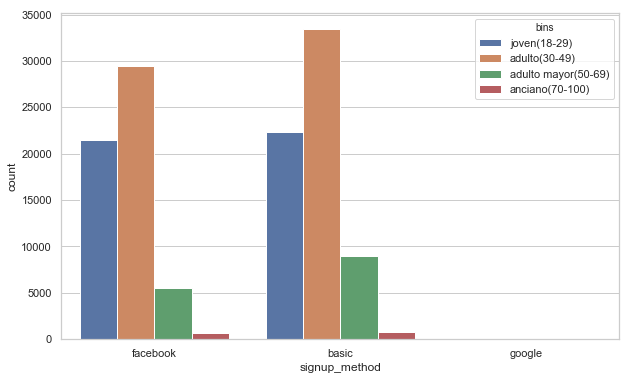

In [65]:
#segmentado por edad
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='signup_method',hue='bins')

In [59]:
#10. ¿Hay un signup_app preferido?, ¿Y por sexo?, ¿Y por edad?
data.signup_app.mode()

0    Web
dtype: object

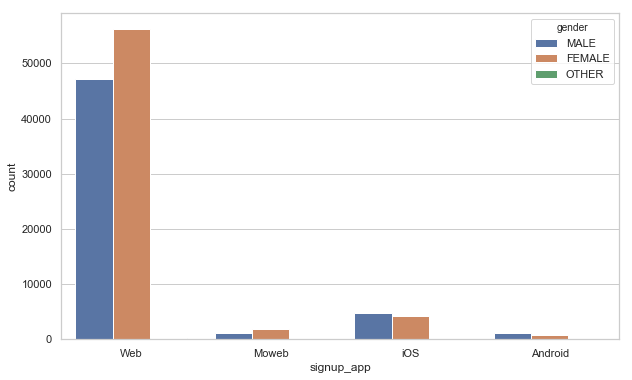

In [60]:
#segmentado por sexo
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='signup_app',hue='gender')

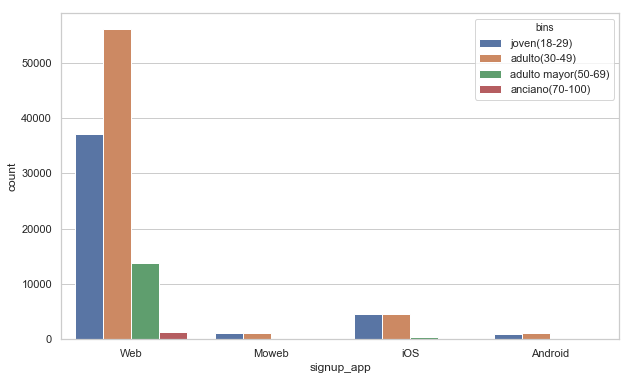

In [64]:
#segmentado por edad
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='signup_app',hue='bins')

In [68]:
#11. ¿Cuál es el dispositivo más usado, según el sexo y la edad de los usuarios?
data.first_device_type.unique()

array(['Mac Desktop', 'Windows Desktop', 'iPhone', 'Other/Unknown',
       'Desktop (Other)', 'Android Tablet', 'iPad', 'Android Phone',
       'SmartPhone (Other)'], dtype=object)

In [70]:
data.first_device_type.mode()

0    Mac Desktop
dtype: object

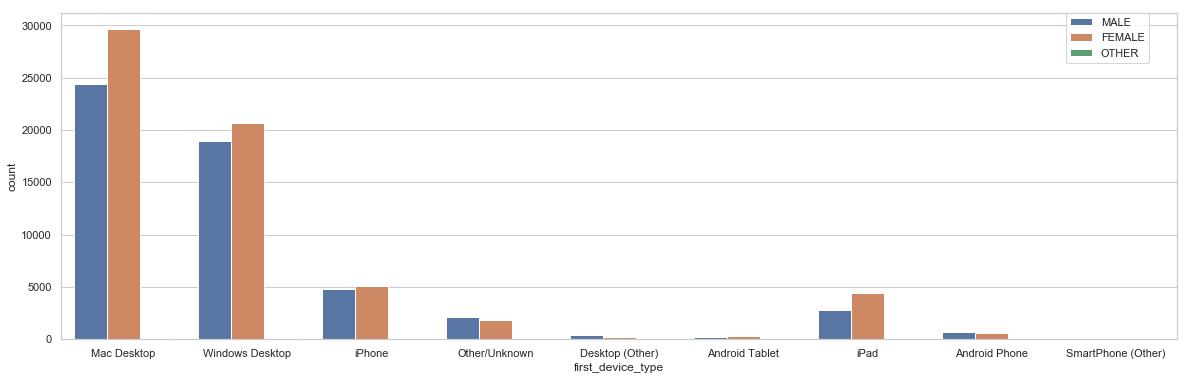

In [85]:
#segmentado por sexo
plt.figure(figsize=(20,6))
sns.countplot(data=data, x='first_device_type',hue='gender')
plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)

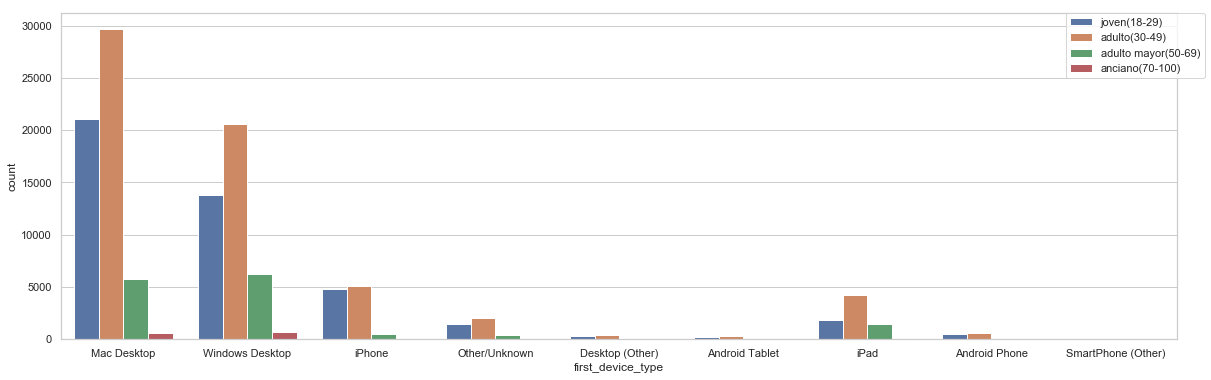

In [86]:
#segmentado por edad
plt.figure(figsize=(20,6))
sns.countplot(data=data, x='first_device_type',hue='bins')
plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)

In [88]:
# 12. Si bien los usuarios son de EEUU, ¿Existen usuarios con otras preferencias idiomáticas?
data.language.unique()

array(['en', 'fr', 'de', 'es', 'it', 'pt', 'zh', 'ko', 'ja', 'ru', 'pl',
       'el', 'sv', 'nl', 'hu', 'da', 'id', 'fi', 'no', 'tr', 'th', 'cs',
       'hr', 'ca', 'is'], dtype=object)

In [89]:
data.groupby(['language']).language.count()

language
ca         5
cs        32
da        58
de       732
el        24
en    206314
es       915
fi        14
fr      1172
hr         2
hu        18
id        22
is         5
it       514
ja       225
ko       747
nl        97
no        30
pl        54
pt       240
ru       389
sv       122
th        24
tr        64
zh      1632
Name: language, dtype: int64

Si existen 24 idiomas más que se han seleccionado.

In [90]:
#13. ¿Existe alguna correlación entre el lugar elegido y la edad de los usuarios?
data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,bins
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,adulto(30-49)
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,adulto mayor(50-69)
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,adulto(30-49)
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,adulto(30-49)


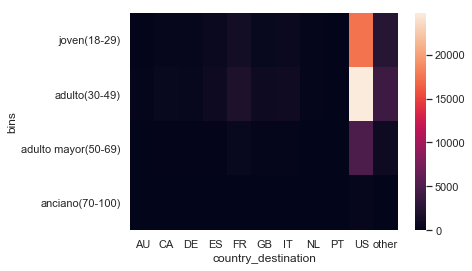

In [110]:
idata = data.query('country_destination != "NDF"')
exp = idata[['bins', 'country_destination']]
exp = exp.pivot_table(index='bins', columns='country_destination', aggfunc=len, fill_value=0)
sns.heatmap(exp)


In [113]:
#usamos el test chi-cuadrado
# Usamos la misma tabla que para el heatmap!
chi2, p, dots, expected = stats.chi2_contingency(exp)
chi2, p

(196.77880303702912, 1.9802680589140085e-26)

Podemos rechazar la hipotesis nula ya que el p-valor es muy pequeño, por lo tanto podemos decir que hay poca probabilidad de que las variables sean dependientes.



14. Graficar la cantidad de viajes por fecha. ¿Existe alguna tendencia?

15. Graficar la actividad de los usuarios por día de la semana. ¿Cómo afecta esto a las campañas de marketing?